In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

np.random.seed(8)

In [152]:
#creating the artifical data
duration = 5000

#neuron A with no noise
neuron_a = np.arange(10, duration+1, 10)

#B with noise
base_times = np.arange(10, duration+1, 10)
noise = np.random.normal(0, 2, len(base_times))

neuron_b = base_times + noise

#for C i have used 3 spikes and 50 ms interval between
neuron_c = []
for burst in range(0, duration, 50):
    c_spikes.extend([burst+1, burst+2, burst+3])
neuron_c = np.array(c_spikes)


# Checking arrays
print("Neuron A spikes:", neuron_a_spikes[:10])
print("Neuron B spikes:", neuron_b_spikes[:10])
print("Neuron C spikes:", neuron_c_spikes[:10])

Neuron A spikes: [ 10  20  30  40  50  60  70  80  90 100]
Neuron B spikes: [ 10.18240943  22.18256547  26.10605938  37.22730094  45.40701685
  64.81966861  73.45567234  84.40911257  91.58965528 101.95284219]
Neuron C spikes: [  1 101 201 301 401 501 601 701 801 901]


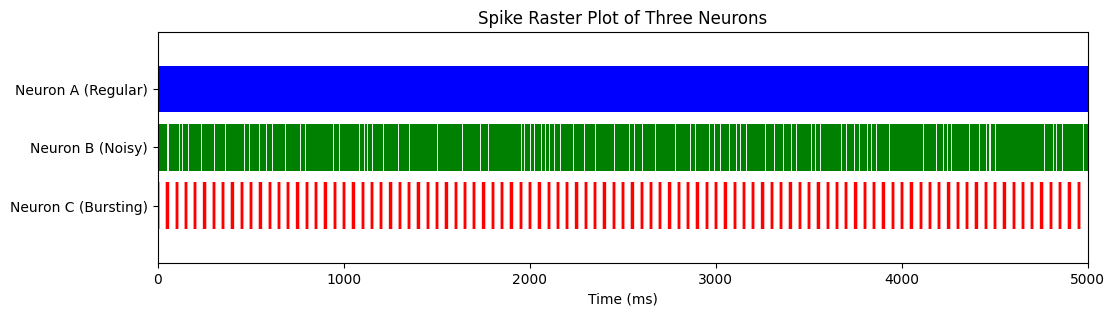

In [153]:
plt.figure(figsize=(12, 3))

plt.eventplot([neuron_a, neuron_b, neuron_c],
              colors=['blue', 'green', 'red'],
              lineoffsets=[2, 1, 0],
              linelengths=0.8)

plt.yticks([2, 1, 0],
           ['Neuron A (Regular)',
            'Neuron B (Noisy)',
            'Neuron C (Bursting)'])

plt.xlabel('Time (ms)')
plt.title('Spike Raster Plot of Three Neurons')
plt.xlim(0, 5000)
plt.show()


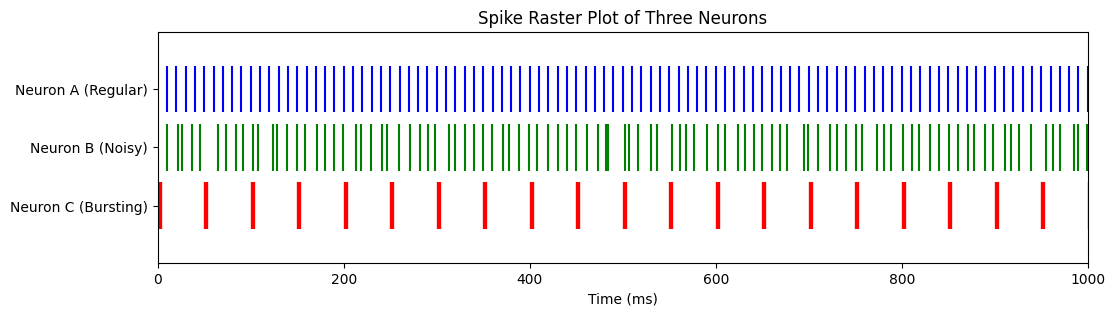

In [154]:
#to better understanding and interpretation I wanted to look closer to pilot
plt.figure(figsize=(12, 3))

plt.eventplot([neuron_a, neuron_b, neuron_c],
              colors=['blue', 'green', 'red'],
              lineoffsets=[2, 1, 0],
              linelengths=0.8)

plt.yticks([2, 1, 0],
           ['Neuron A (Regular)',
            'Neuron B (Noisy)',
            'Neuron C (Bursting)'])

plt.xlabel('Time (ms)')
plt.title('Spike Raster Plot of Three Neurons')
plt.xlim(0, 1000)
plt.show()

Questions: What did you see? Did the results match your expectations?

Answers: While Neuron A fires spikes at perfectly regular intervals throughout the recording, Neuron B shows a generally regular firing pattern with small temporal variability introduced by noise.
Neuron C firing pattern looks different than Neuron A and B, with bursts of spikes separated by intervals of silence. These results match my expectations.

Part B: Analyze Inter-Spike Intervals (ISI)

In [155]:
#using np.diff to find difference of consecutive spike times
isi_a = np.diff(neuron_a)
isi_b = np.diff(neuron_b)
isi_c = np.diff(neuron_c)

#checking arrays
print("Neuron A ISI:", isi_a[:10])
print("Neuron B ISI:", isi_b[:10])
print("Neuron C ISI:", isi_c[:10])

Neuron A ISI: [10 10 10 10 10 10 10 10 10 10]
Neuron B ISI: [12.00015603  3.92349392 11.12124155  8.17971592 19.41265176  8.63600373
 10.95344023  7.18054271 10.36318691  5.68030351]
Neuron C ISI: [ 1  1 48  1  1 48  1  1 48  1]


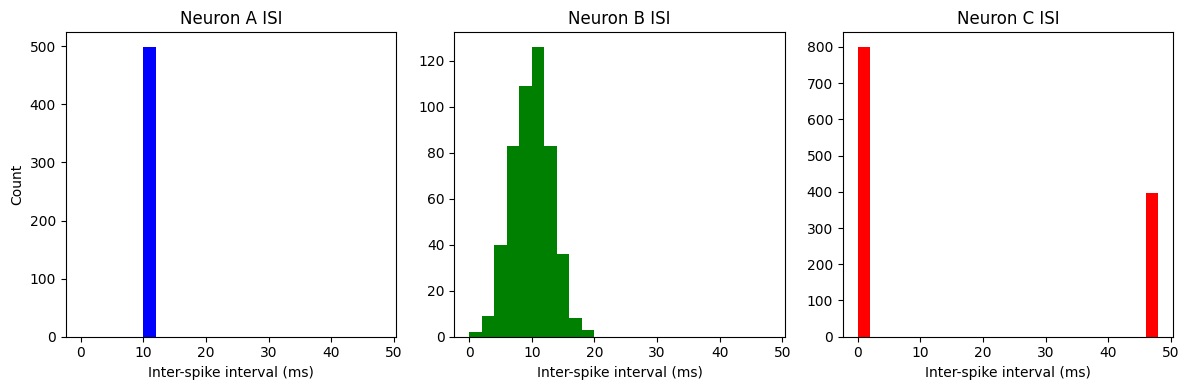

In [156]:
plt.figure(figsize=(12, 4))

bins = np.arange(0, 50, 2)

plt.subplot(1, 3, 1)
plt.hist(isi_a, bins=bins, color = "b")
plt.title("Neuron A ISI")
plt.xlabel("Inter-spike interval (ms)")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
plt.hist(isi_b, bins=bins, color = "g")
plt.title("Neuron B ISI")
plt.xlabel("Inter-spike interval (ms)")

plt.subplot(1, 3, 3)
plt.hist(isi_c, bins=bins, color='r')
plt.title("Neuron C ISI")
plt.xlabel("Inter-spike interval (ms)")

plt.tight_layout()
plt.show()

Questions:

- What does the ISI histogram look like for a perfectly regular neuron?
- How does noise affect the ISI distribution?
- What distinguishes a bursting neuron's ISI histogram from a regular neuron's?

Answers:


- All of the intervals are the same for Neuron A without noise. For a perfectly regular neuron the ISI histogram is one bar at x = 10.
- Noise introduces small variations in spike timing, which makes the ISI histogram wider and more spread out around the average interval.
- A bursting neuron's ISI has two bars instead of one. (for short intervals for spikes within bursts and longer intervals between bursts.)

In [157]:

mean_interval = 10
std_interval = 2
duration = 5000

n_intervals = 1000  #normally we would need 5000%10 = 500 size but to be sure I doubled
intervals = np.random.normal(mean_interval, std_interval, n_intervals)

# Remove negative/0 intervals
intervals[intervals < 1] = 1

simulated_spikes = np.cumsum(intervals)
simulated_spikes = simulated_spikes[simulated_spikes <= duration]

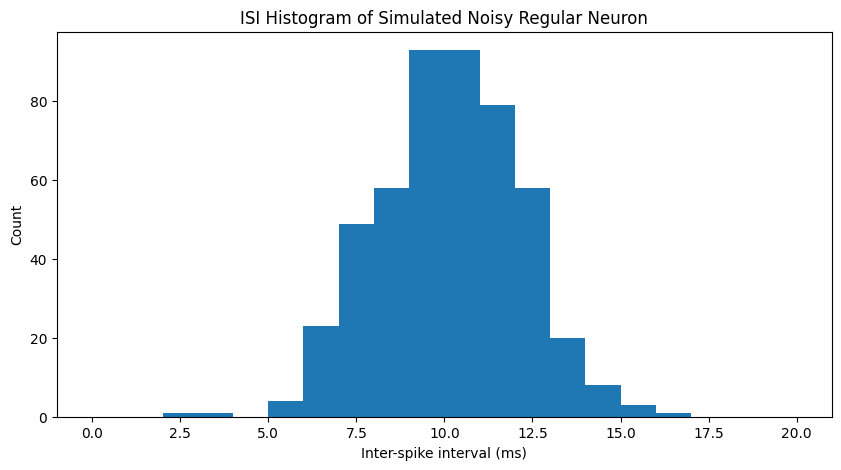

In [158]:
sim_isi = np.diff(simulated_spikes)

plt.figure(figsize=(10,5))

bins = np.arange(0, 21, 1)

plt.hist(sim_isi, bins=bins)
plt.xlabel("Inter-spike interval (ms)")
plt.ylabel("Count")
plt.title("ISI Histogram of Simulated Noisy Regular Neuron")
plt.show()

The synthetic neuron most closely resembles Neuron B.

What features of the ISI histogram led you to this conclusion?
The ISI histogram shows a single peak centered around ~10 ms with noticeable spread, indicating regular firing with variability caused by noise rather than perfectly fixed (A) or bursting intervals (C).

How does changing the standard deviation parameter affect the ISI distribution?
Increasing the standard deviation makes the ISI distribution wider and more spread out, reflecting greater variability in spike timing.

⸻


Q2.

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

# Plot the price of all the laptops

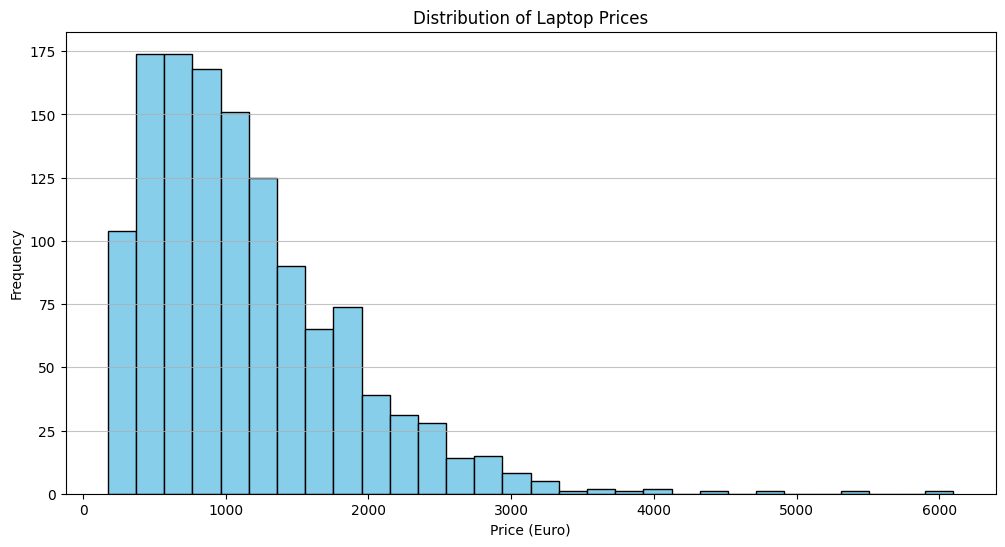

In [160]:
# Ploting the prices
plt.figure(figsize=(12, 6))
plt.hist(df["Price (Euro)"], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price (Euro)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


# Which company has on average the most expensive laptop? What is the average laptop price for each company?

In [161]:
avg_price_by_company = df.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)
avg_price_by_company
#the most expensive company is Razer

,Price (Euro)
Company,
Razer,3346.142857
LG,2099.000000
MSI,1728.908148
Google,1677.666667
Microsoft,1612.308333
Apple,1564.198571
Huawei,1424.000000
Samsung,1413.444444
Toshiba,1267.812500


# Find the different types of Operating systems present in the data - under the column name "OpSys"


In [162]:
# Find the different types or operation systems
# Check unique values before cleaning
print("OpSys before cleaning:", df['OpSys'].unique())
print()

#Fix inconsistent naming
#Common variations in laptop datasets usually involve macOS/Mac OS X and Windows versions
df['OpSys'] = df['OpSys'].replace({
    'Mac OS X': 'macOS',
    'Windows 10': 'Windows',
    'Windows 7': 'Windows',
    'Windows 10 S': 'Windows'
})

# Get unique operating systems after cleaning
unique_opsys = df['OpSys'].unique()
print("OpSys after cleaning:", unique_opsys)

OpSys before cleaning: ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']

OpSys after cleaning: ['macOS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


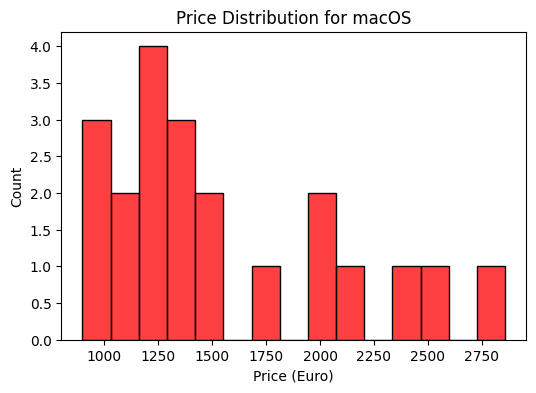

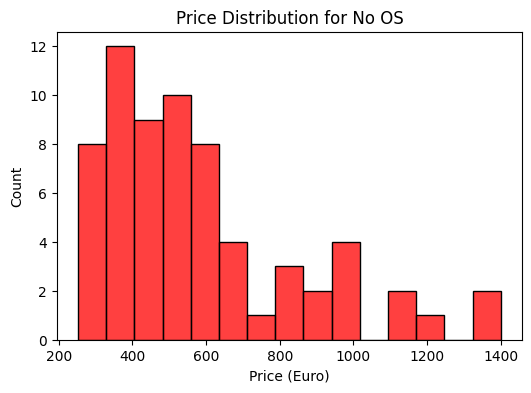

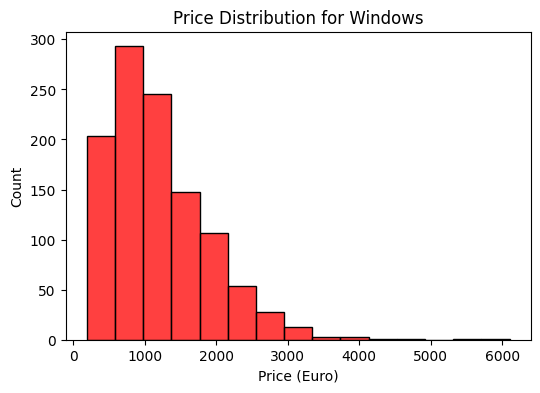

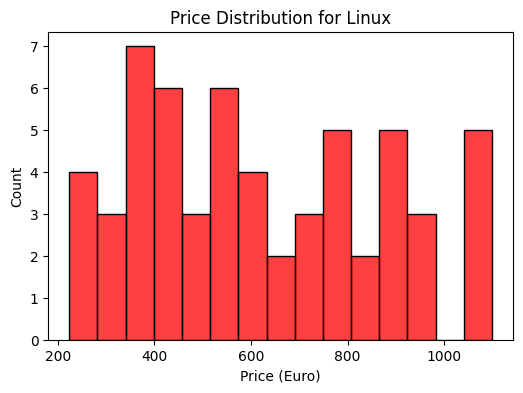

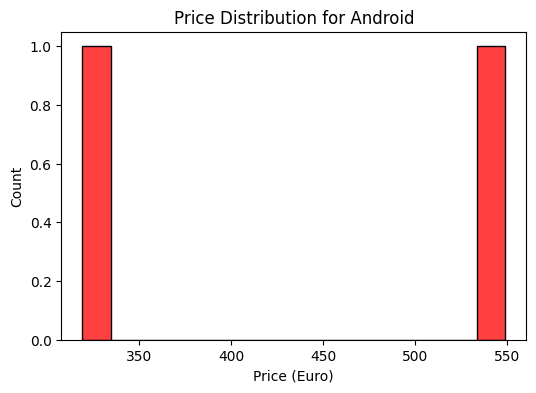

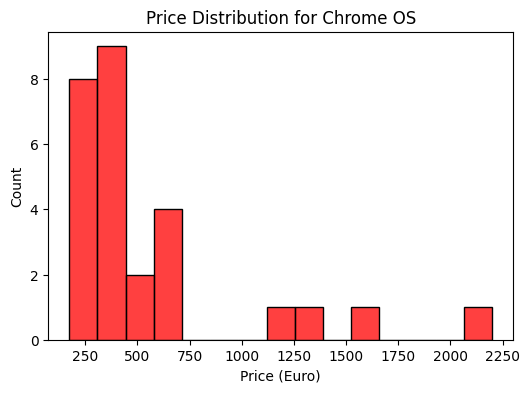

In [163]:
unique_os = df['OpSys'].unique()

for os in unique_os:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[df['OpSys'] == os]['Price (Euro)'],
                 bins=15, color='red', )
    plt.title(f'Price Distribution for {os}')
    plt.xlabel('Price (Euro)')
    plt.ylabel('Count')
    plt.show()

# What is the relationship between RAM and computer price? add an adequate plot to support your findings.

In [164]:
#Relationship Between RAM and Price
correlation = df['RAM (GB)'].corr(df['Price (Euro)'])
print(correlation)

0.7402865271622695


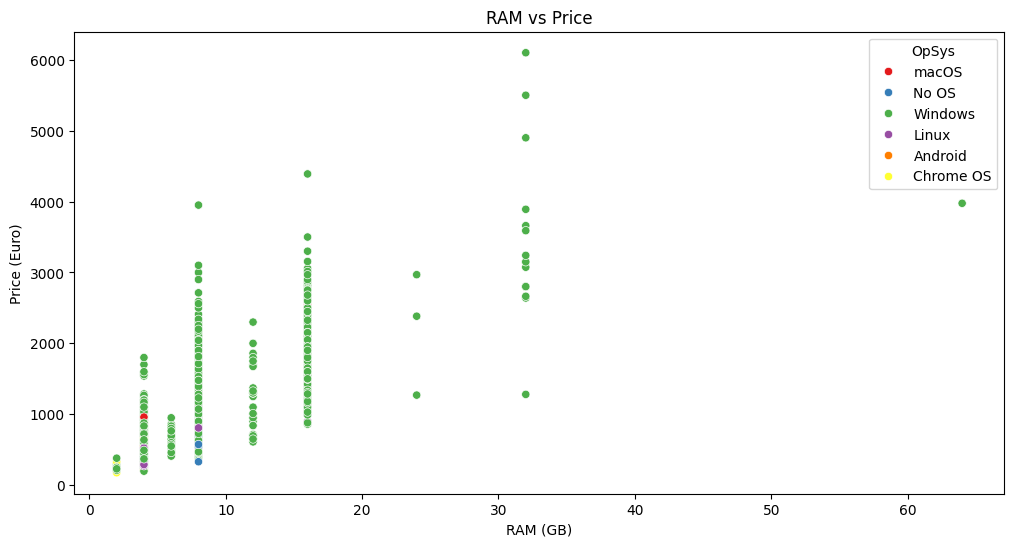

In [165]:
#The scatter plot shows a positive relationship between RAM and laptop price,
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='RAM (GB)', y='Price (Euro)', hue='OpSys', palette='Set1')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.title('RAM vs Price')
plt.show()

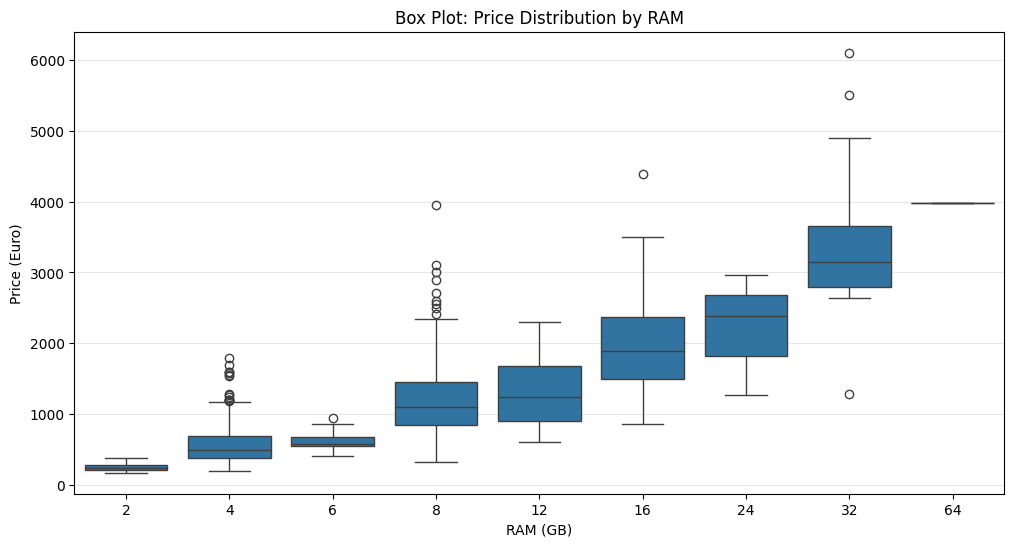

In [166]:
# Using a Box Plot is better to detect outliers for the next task
plt.figure(figsize=(12, 6))
sns.boxplot(x='RAM (GB)', y= df['Price (Euro)'], data=df)
plt.title('Box Plot: Price Distribution by RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [167]:
#How to detect outliers ?
#Either from the box plot or
#We calculate the Interquartile Range (IQR = Q3 - Q1).
#Any price above (Q3 + 1.5 * IQR) or below (Q1 - 1.5 * IQR) for each RAM group is considered an outlier.
Q1 = df['Price (Euro)'].quantile(0.25)
Q3 = df['Price (Euro)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Price (Euro)'] < lower_bound) | (df['Price (Euro)'] > upper_bound)]
outliers[['Company', "RAM (GB)" , 'Price (Euro)']].head()

,Company,RAM (GB),Price (Euro)
17,Apple,16,2858.0
196,Razer,32,6099.0
204,Dell,16,3055.0
238,Asus,32,3890.0
247,Asus,16,2999.0


Create a new column for the dataframe called "Storage type" that extracts the
storage type from the column "Memory".

In [168]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [169]:
#since the values in the Memory column are stored as mixed text strings that
#contain both capacity information (numbers, GB/TB) and storage type labels (e.g., SSD, HDD, Flash Storage).
#to extract only the storage type, numerical values and capacity units should be removed

def get_storage_type(memory):
    # Some laptops have more than one storage type (e.g. "SSD + HDD"),
    # so we first split the string using the '+' symbol
    parts = memory.split('+')
    types = []

    for p in parts:
        p = p.strip()

        # Remove all numbers and decimal points
        for ch in p:
            if ch.isdigit() or ch == '.':
                p = p.replace(ch, '')

        # Remove capacity units (GB, TB)
        p = p.replace('GB', '').replace('TB', '')

        # Remove extra spaces
        p = ' '.join(p.split())

        types.append(p)

    # Remove duplicate storage types if present
    types = list(dict.fromkeys(types))

    # Combine multiple storage types if needed
    return ' + '.join(types)

df['Storage type'] = df['Memory'].apply(get_storage_type)
df[['Memory', 'Storage type']].head(10)


,Memory,Storage type
0,128GB SSD,SSD
1,128GB Flash Storage,Flash Storage
2,256GB SSD,SSD
3,512GB SSD,SSD
4,256GB SSD,SSD
5,500GB HDD,HDD
6,256GB Flash Storage,Flash Storage
7,256GB Flash Storage,Flash Storage
8,512GB SSD,SSD
9,256GB SSD,SSD


In [170]:
df['Storage type'].unique()

array(['SSD', 'Flash Storage', 'HDD', 'SSD + HDD', 'Hybrid',
       'Flash Storage + HDD', 'SSD + Hybrid'], dtype=object)